<a href="https://colab.research.google.com/github/hyeonzz/ESAA-23-2/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82_%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##와인 품질 분류 경진 대회

###ESAA 9기 YB 3조 미니프로젝트2

###라이브러리 로딩

In [213]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

###데이터 불러오기

In [214]:
from google.colab import drive
drive.mount('/content/gdrive')

train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###간단한 EDA

In [215]:
# train 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 13개 변수를 가집니다.
train.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [216]:
# test 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 12개 변수를 가집니다.
# train 중 quality 변수가 사라졌습니다.
test.head(3)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,white


In [217]:
# train 데이터의 열 별 정보를 살펴봅니다.
# 결측치는 없습니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<Axes: >

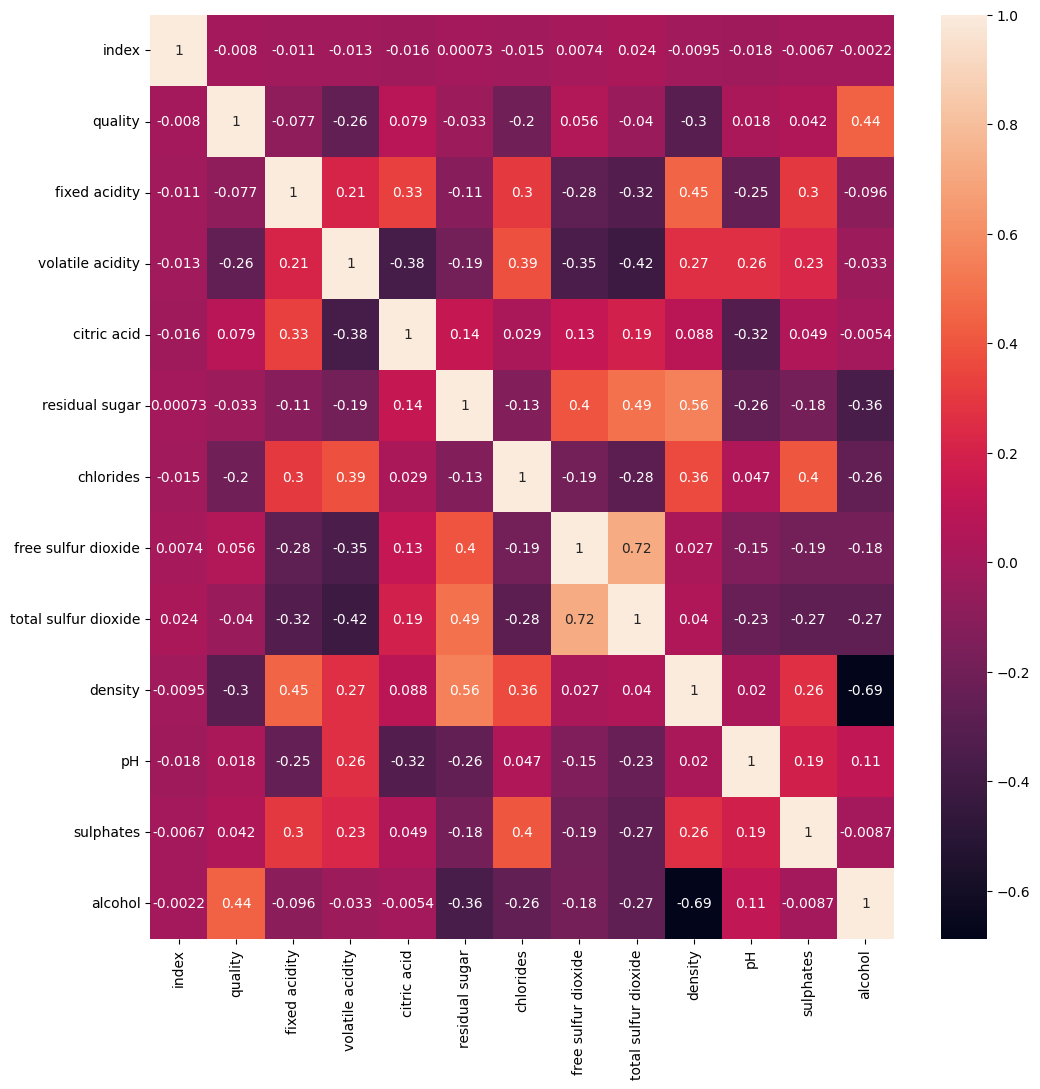

In [218]:
# train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)

quality와 양의 상관관계: alcohol

quality와 음의 상관관계: volatile acidity, density

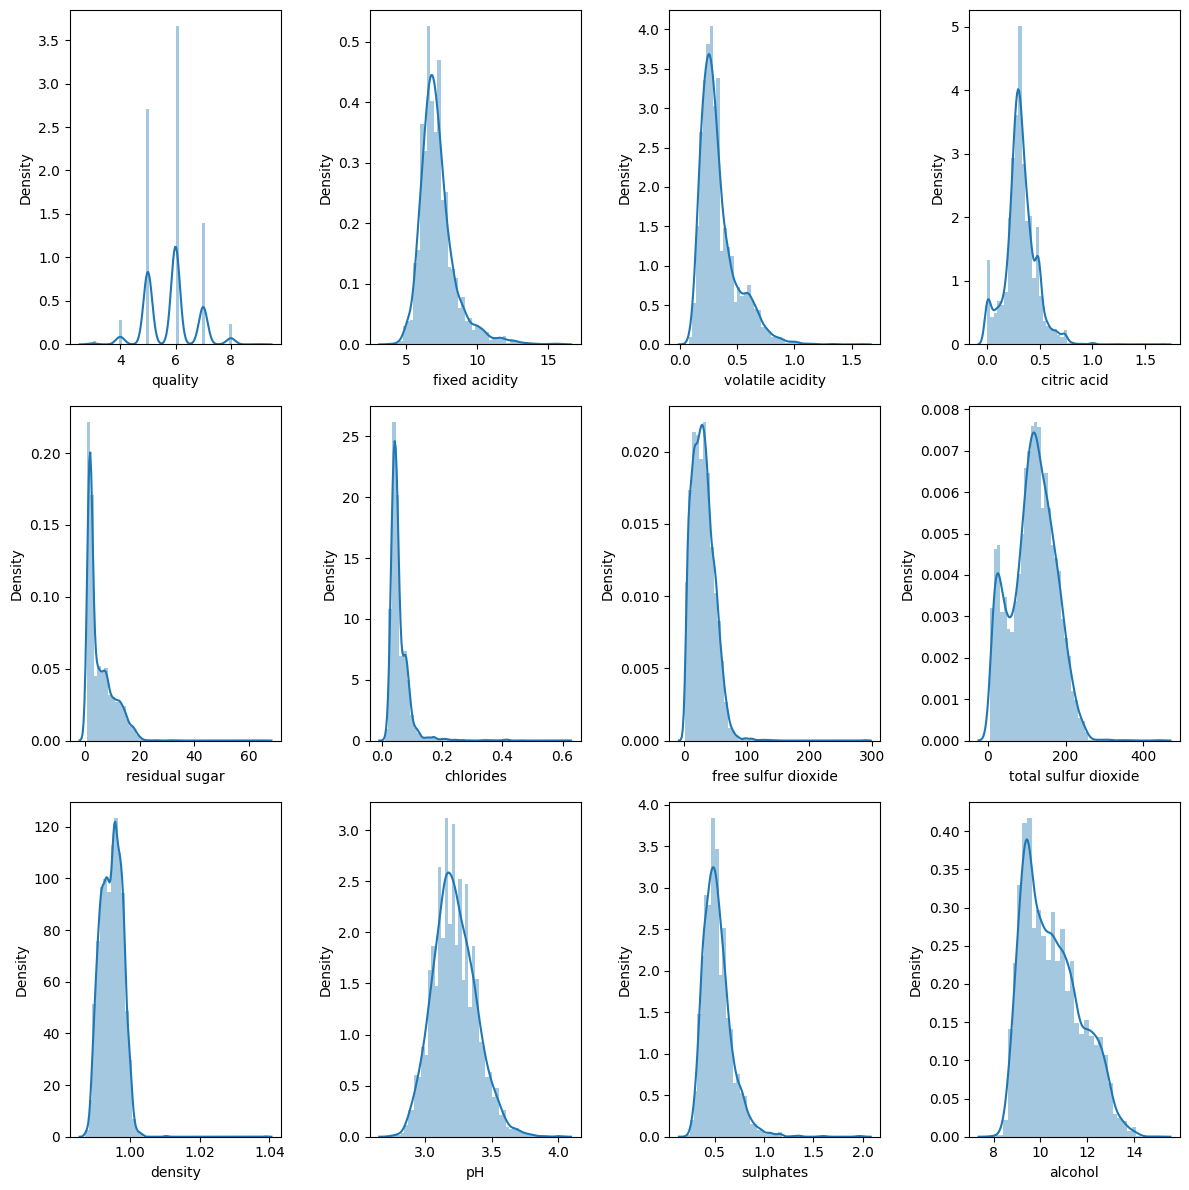

In [219]:
# train의 각 변수별 분포를 살펴봅니다.
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

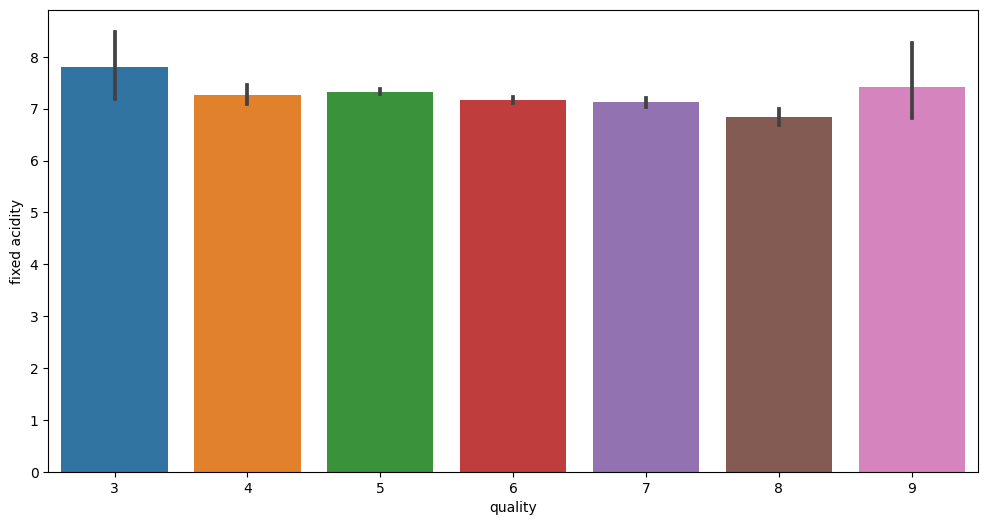

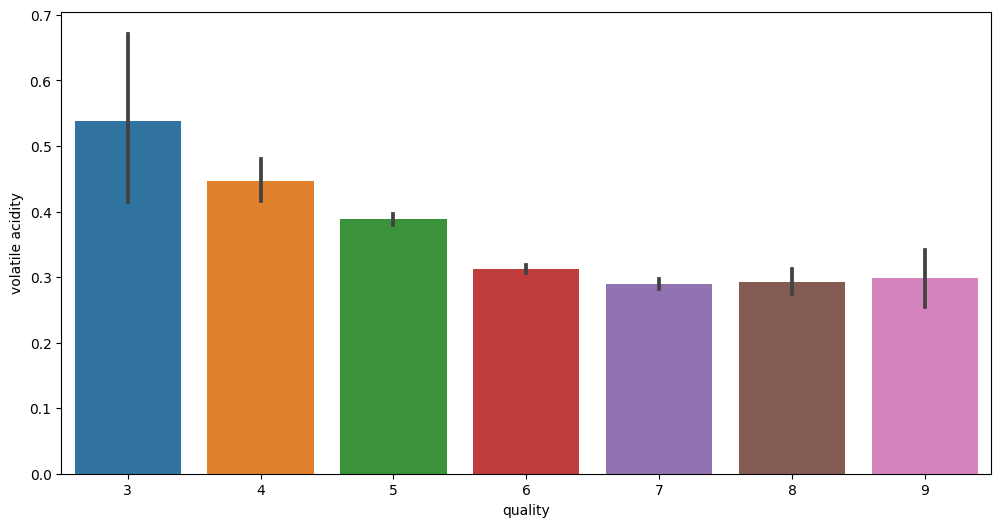

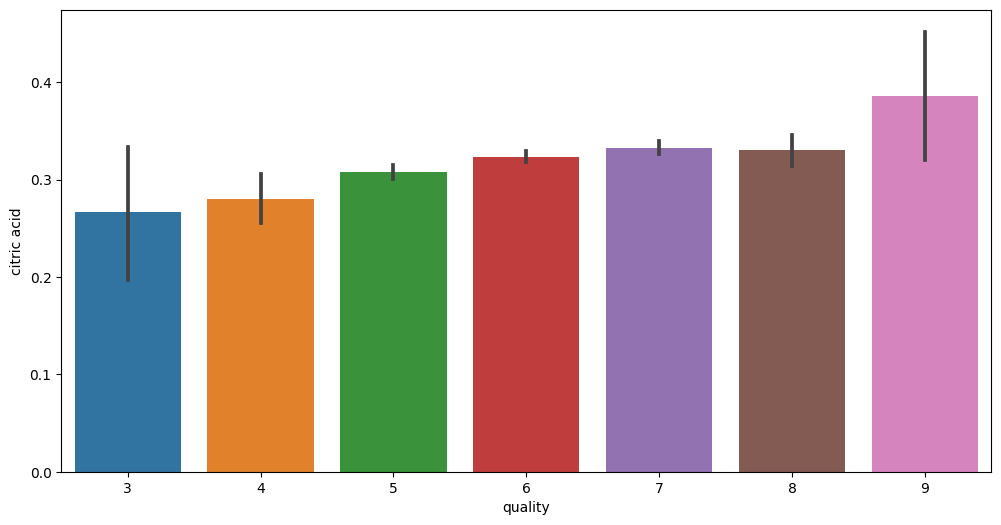

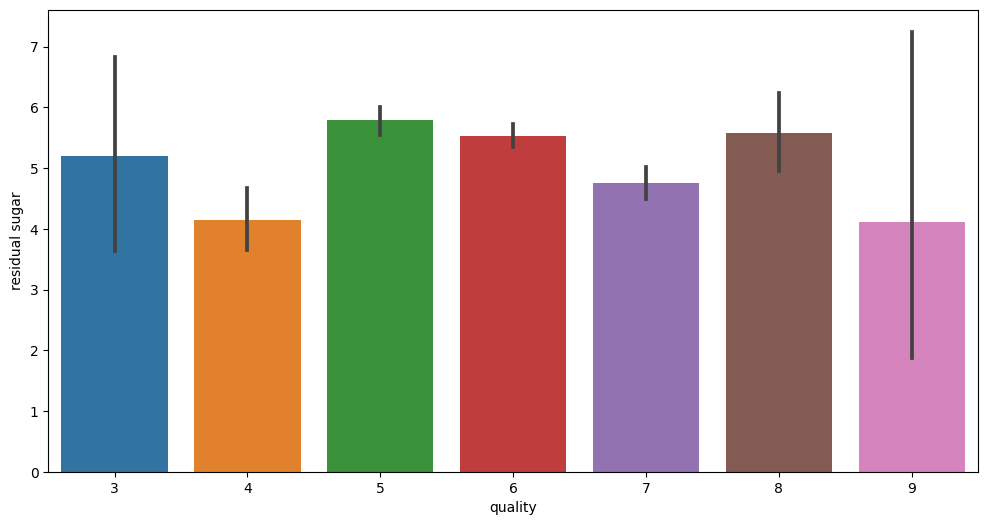

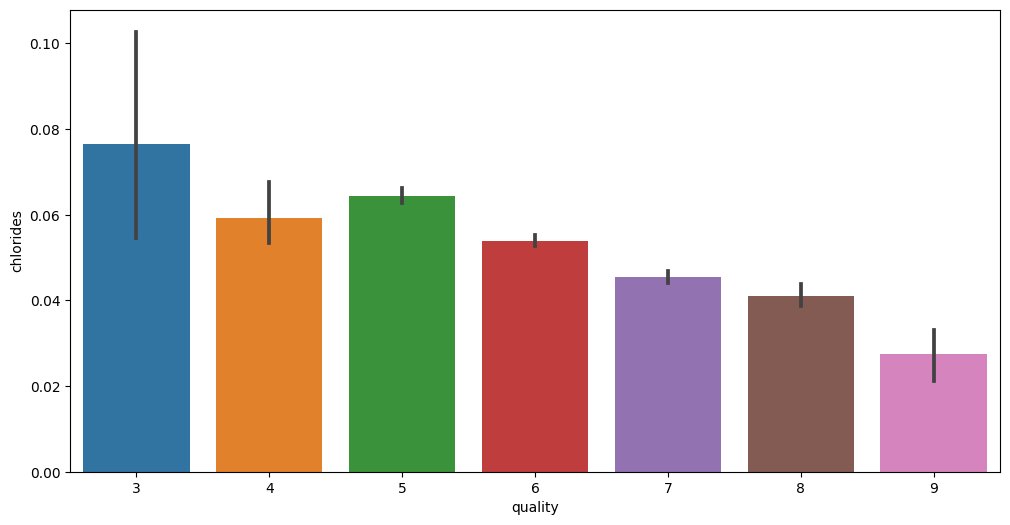

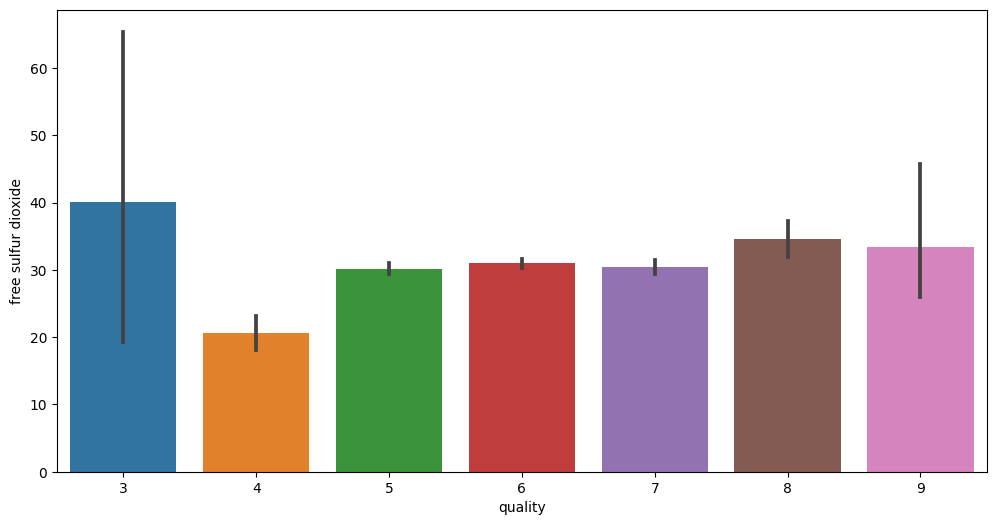

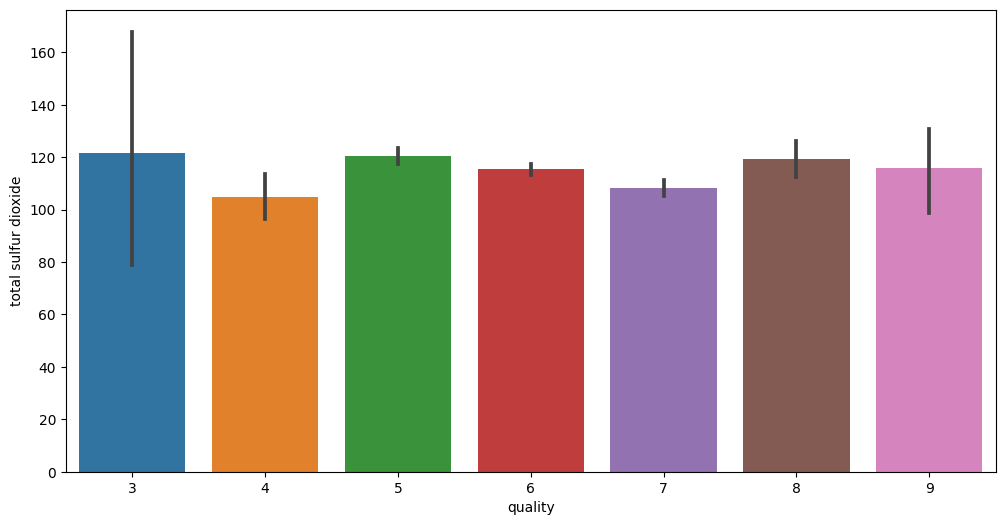

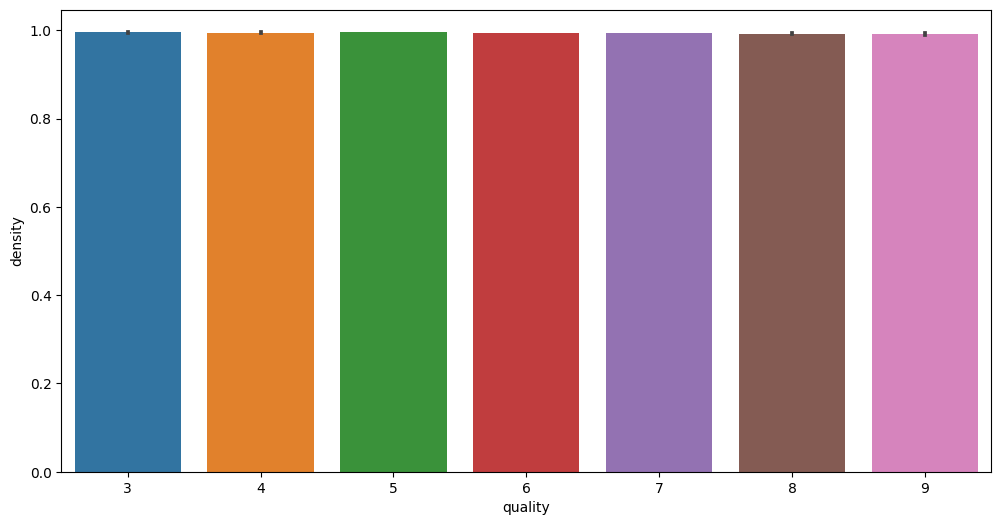

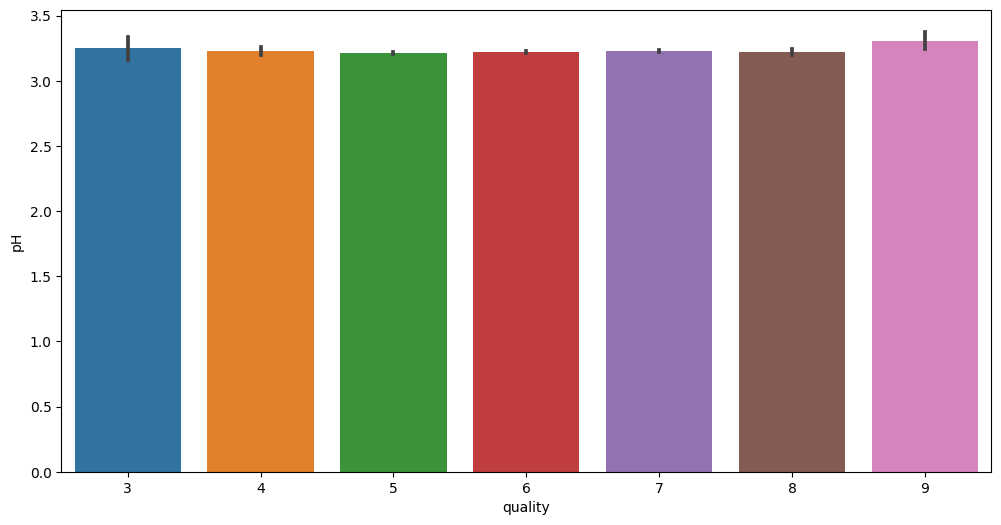

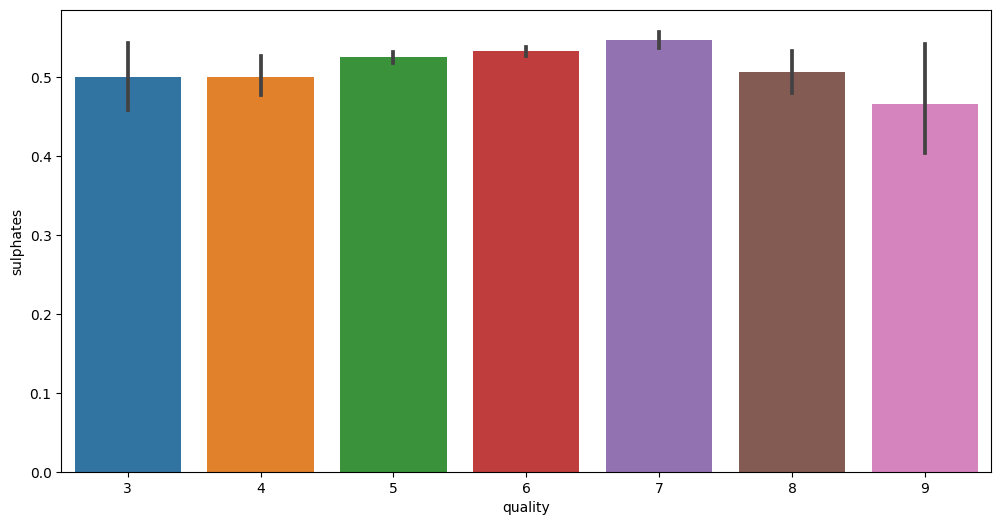

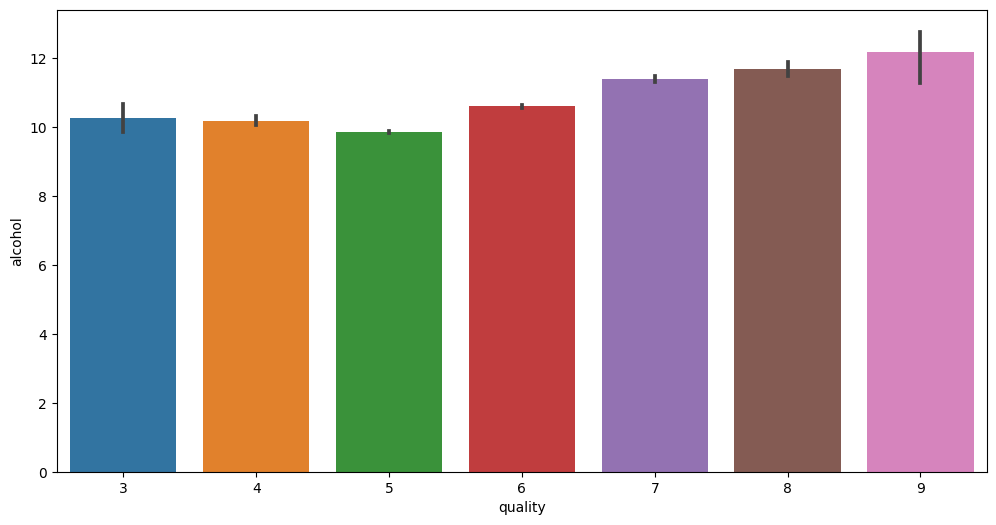

In [220]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

### 데이터 전처리

In [221]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [222]:
train.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1


In [223]:
# 불필요한 변수 제거
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [224]:
train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

###모델링 진행

## **DecisionTree Classifier(0.619)**  


In [225]:
from sklearn.tree import DecisionTreeClassifier

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=42)

#DecisionTreeClassifier 학습
dt_clf.fit(train_x, train_y)

# 학습된 모델로 test 데이터 예측
y_pred = dt_clf.predict(test_x)

In [226]:
#DecisionTreeClassifier 의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n',dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [227]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[1,2,4,6,8,10,12,16,20,24,26,28,30,32,34,36,38,40],'min_samples_split':[1,2,3,4,6,8,16,24,32,40]}

grid_cv=GridSearchCV(dt_clf,param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(train_x,train_y)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
GridSearchCV 최고 평균 정확도 수치: 0.5865
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 20, 'min_samples_split': 2}


In [228]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(test_x)

###제출 파일 생성

In [229]:
submission_decisiontree = pd.read_csv('/content/sample_submission.csv')

In [230]:
submission_decisiontree['quality'] = pred1

In [231]:
submission_decisiontree

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,6
998,998,6


In [232]:
# csv 파일로 저장합니다.
submission_decisiontree.to_csv('submission_decisiontree.csv', index=False)

### ->0.619

##**RandomForestClassifier(0.692)**

In [233]:
from sklearn.ensemble import RandomForestClassifier
# 모델 선언
model = RandomForestClassifier()

#모델 학습
model.fit(train_x, train_y)

# 학습된 모델로 test 데이터 예측
y_pred = model.predict(test_x)

In [234]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_x, train_y)
pred = rf_clf.predict(test_x)


###제출 파일 생성

In [235]:
submission = pd.read_csv('/content/sample_submission.csv')

In [236]:
submission['quality'] = y_pred

In [237]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [238]:
# csv 파일로 저장합니다.
submission.to_csv('baseline_randomforest.csv', index=False)

### -> 0.692

## **xgboost(0.69)**

In [239]:
#xgboost
from xgboost import XGBClassifier

#레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train_y)

# 최적의 파라미터 구하기
from sklearn.model_selection import GridSearchCV
xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth': [5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}
#cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(train_x, y_train)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)


GridSearchCV 최적 파라미터: {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}


In [240]:
#구한 파라미터를 대입해 학습 및 예측하기
from sklearn.metrics import confusion_matrix
xgb = XGBClassifier(n_estimators=1000, learning_rate = 0.3, max_depth=7, colsample_bytree=0.75, min_child_weight=1, reg_alpha=0.02)
xgb.fit(train_x, y_train)
preds = xgb.predict(test_x)
#레이블 인코딩 값 디코딩
preds = le.inverse_transform(preds)

###제출 파일 생성

In [241]:
submission = pd.read_csv('sample_submission.csv')

In [242]:
submission['quality'] = preds

In [243]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


In [244]:
# csv 파일로 저장합니다.
submission.to_csv('baseline_xgboost.csv', index=False)

### -> 0.69

## **Gradient Boosting(0.695)**

In [245]:
X_train = train.drop(['index', 'quality'], axis = 1)
y_train = train['quality']
X_test = test.drop('index', axis = 1)

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

params={'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.5856


In [247]:
params={'n_estimators':[400], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 400}
최고 예측 정확도: 0.5887


In [248]:
params={'n_estimators':[400], 'max_depth':[10, 18, 24, 32], 'min_samples_leaf':[8,12,18], 'min_samples_split':[6, 12, 18]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 400}
최고 예측 정확도: 0.5912


###제출 파일 생성



In [249]:
submission_gbm = pd.read_csv('/content/sample_submission.csv')

In [250]:
submission_gbm['quality'] = y_pred

In [251]:
submission_gbm

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [252]:
# csv 파일로 저장합니다.
submission_gbm.to_csv('baseline.csv', index=False)

### -> 0.695

## **Logistic Regression(0.696)**

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

In [254]:
params = {'penalty':['l2', 'l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.474


In [255]:
params = {'penalty':['l2', 'l1'], 'C':[0.001, 0.1, 1, 3, 5, 15]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.474


###제출 파일 생성

In [256]:
submission_gbm = pd.read_csv('/content/sample_submission.csv')

In [257]:
submission_gbm['quality'] = y_pred

In [258]:
submission_gbm

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [259]:
# csv 파일로 저장합니다.
submission_gbm.to_csv('baseline.csv', index=False)

### -> 0.696

## **LightGBM(0.663)**

In [260]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

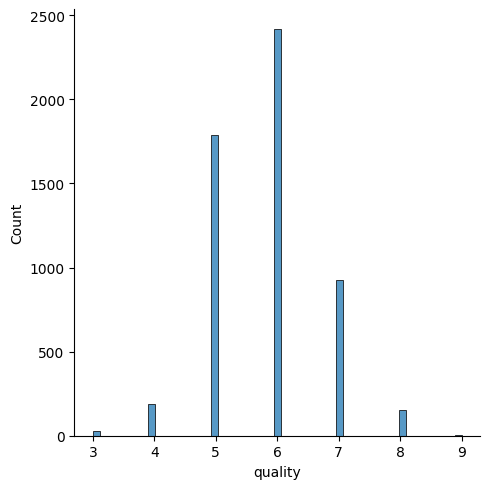

In [261]:
import seaborn as sns
sns.displot(train['quality'])
# 데이터가 왜곡된 분포를 가졌을 경우 데이터를 StandardScaler로 재가공해야하지만, 그래프를 보면 왜곡된 분포도를 가졌다고 보기 어려우므로 재가공을 할 필요는 없다.

In [262]:
# 'num_leaves' : 트리 모델의 복잡도를 조절하는 주요 파라미터
# 'max_depth':  각 트리의 루트 노드와 리프 노드의 최대 거리를 조절하는 파라미터
params = {
    'learning_rate' : [0.005, 0.01, 0.05],
    'num_leaves' : [20, 30, 40],
    'max_depth' : [6, 8, 10, 12]
  }

# n_estimators = 0 가 작아질 수록 하이퍼 파라미터 테스트의 수행 속도가 빨라진다.
lgbm_wine = LGBMClassifier(n_estimator=400)

# cv : 교차검증을 위한 fold 횟수
# n_jobs = -1 : 모든 코어사용
gridcv=GridSearchCV(lgbm_wine, param_grid=params, cv=3 , n_jobs=-1)
gridcv.fit(train_x, train_y)

print('최적 하이퍼 파라미터:\n',gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 5497, number of used features: 12
[LightGBM] [Info] Start training from score -5.353861
[LightGBM] [Info] Start training from score -3.386211
[LightGBM] [Info] Start training from score -1.123105
[LightGBM] [Info] Start training from score -0.822089
[LightGBM] [Info] Start training from score -1.783246
[LightGBM] [Info] Start training from score -3.588077
[LightGBM] [Info] Start training from score -7.002520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [263]:
# 베스트 파라미터로 학습하기
best_lgbm = gridcv.best_estimator_
best_lgbm.fit(train_x, train_y)
pred_y=best_lgbm.predict(test_x)
pred_y

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 5497, number of used features: 12
[LightGBM] [Info] Start training from score -5.353861
[LightGBM] [Info] Start training from score -3.386211
[LightGBM] [Info] Start training from score -1.123105
[LightGBM] [Info] Start training from score -0.822089
[LightGBM] [Info] Start training from score -1.783246
[LightGBM] [Info] Start training from score -3.588077
[LightGBM] [Info] Start training from score -7.002520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

array([5, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 6, 5, 6, 7, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 7, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 5, 4, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 4, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 8, 6, 5, 8, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 8, 7, 6, 6, 6, 6, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 7, 7,

###제출 파일 생성

In [264]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['quality'] = pred_y
submission
# csv 파일로 저장
submission.to_csv('/content/baseline_light.csv', index=False)

### -> 0.663